# Linear Regression

## Table of Contents

1. [**Introduction**](#Intro)   
2. [**Simple Linear Regression**](#SLR)

  2.1 [**Model Development**](#ModelDevSLR) 

  2.2 [**Model Evaluation**](#ModelEvalSLR)

3. [**Multiple Linear Regression**](#MLR)

  3.1 [**Model Development**](#ModelDevMLR)

  3.2 [**Model Evaluation**](#ModelEvalMLR)

4. [**Final Comments**](#FinalComments)


## 1. Introduction <a name="Intro"></a>

__Linear Regression__ is a bread-and-butter modeling technique that should serve as your baseline approach to building data-driven models. These models are typically easy to build, straighforward to interpret, and often do quite well in practice.


## 2. Simple Linear Regression <a name="SLR"></a>

Simple linear regression refers to one independant variable to make a prediction. Generally, we seek to find the best values for $\omega$'s in $f(\text{x})=\omega_o+\omega_1x_1$, which can be found as:


$\omega_1=\frac{\sum_{i=1}^{m}(x^{(i)}-\bar{x})(y^{(i)}-\bar{y})}{\sum_{i=1}^{m}(x^{(i)}-\bar{x})^2}$

$\omega_0=\bar{y}-\omega_1\bar{x}_1$

__Note__: You can find these coefficients using least squares method: https://www.real-statistics.com/regression/least-squares-method/least-squares-method-detailed/

We are going to use scikit-learn (https://scikit-learn.org), which is one of the most commonly used machine learning libraries in Python.


### 2.1 Model Development <a name="ModelDevSLR"></a>

Here are the steps to implement simple linear regression in Python using `scikit-learn`.

__1.__ Import linear regression and train_test_split funcions from `scikit_learn` library:
```python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
```

__2.__ Define independent variable (feature) and dependent variable (target variable) from data set:
```python
x_data=np.array(df[['column1']])
y_data=np.array(df[['column2']])
```

__3.__ Split the data into train and test sets while determining the train/test size split: `x_train,x_test,y_train,y_test=train_test_split(x_data, y_data, test_size=0.2, shuffle=True)`


__4.__ Create an instance of linear regression using the constructor: `lm = LinearRegression() `


__5.__ Use the fit function to fit the model to the training data and find the coefficients $\omega_o$ and $\omega_1$: `lm.fit(x_train,y_train)`

__6.__ Make prediction using the test data: `yhat=lm.predict(x_test)`

Let's use our 3D printer data set. The aim of the study was to determine how much of the adjustment parameters in 3d printers affect the print quality, accuracy and strength. There are nine setting parameters and three measured output parameters.

Setting Parameters:

•	Layer Height (mm)

•	Wall Thickness (mm)

•	Infill Density (%)

•	Infill Pattern ()

•	Nozzle Temperature (ºC)

•	Bed Temperature (ºC)

•	Print Speed (mm/s)

•	Material ()

•	Fan Speed (mm/s)


Output Parameters: (Measured)

•	Roughness (µm)

•	Tensile (ultimate) Strenght (MPa)

•	Elongation (%) 

This work is based on the Ultimaker S5 3D printer settings and filaments.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/MasoudMiM/ME_364/main/3D_Printer_Data/3DPrinterDataset.csv'   # Link to the 3D printer data set
df = pd.read_csv(url)

# Dataset is now stored in a Pandas's Dataframe
df.head()


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


Typically, we need to first do an exploratory data analysis before we start developing a model. However, here we assume that some data cleaning and exploratory data analysis has been done on the data set. Let's just take a look at layer height and roughness.

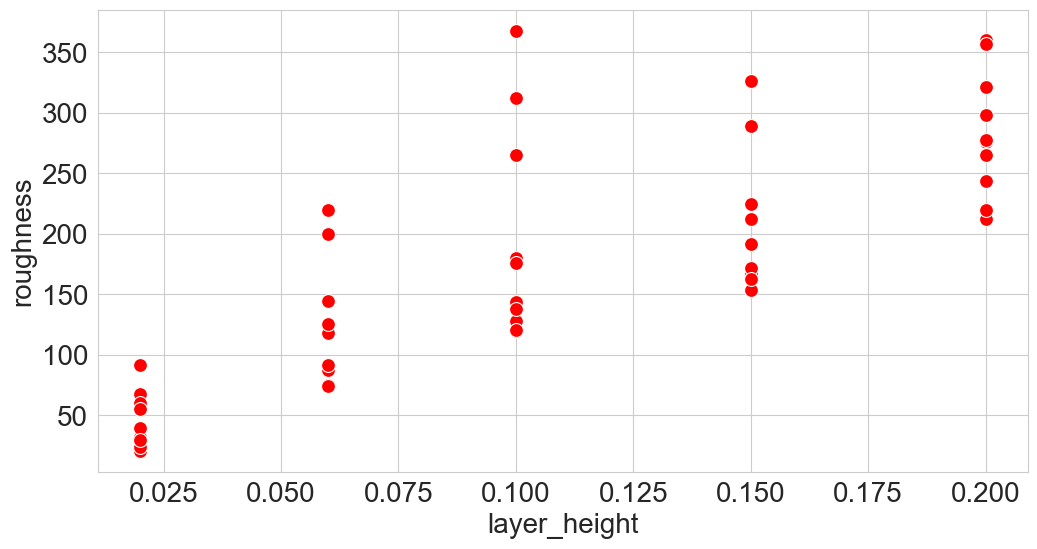

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font',size=20)
# OR you could use
#plt.rcParams.update({'font.size':20})
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='layer_height', y='roughness', 
                s=100, color='r');

Let's develop a simple linear regression model, considering independent variable "layer height" and dependent variable "roughness".

In [4]:
# importing required functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
# defining the I.V. (feature) and Target Variable (Dependent variable)
import numpy as np

x_datal=np.array(df[['layer_height']])   # I.V.
y_datal=np.array(df[['roughness']])      # Target Variable

In [6]:
# Splitting the data into train and test 80/20
x_trainl,x_testl,y_trainl,y_testl=train_test_split(
    x_datal,y_datal, test_size=0.2, shuffle=True, random_state=100)

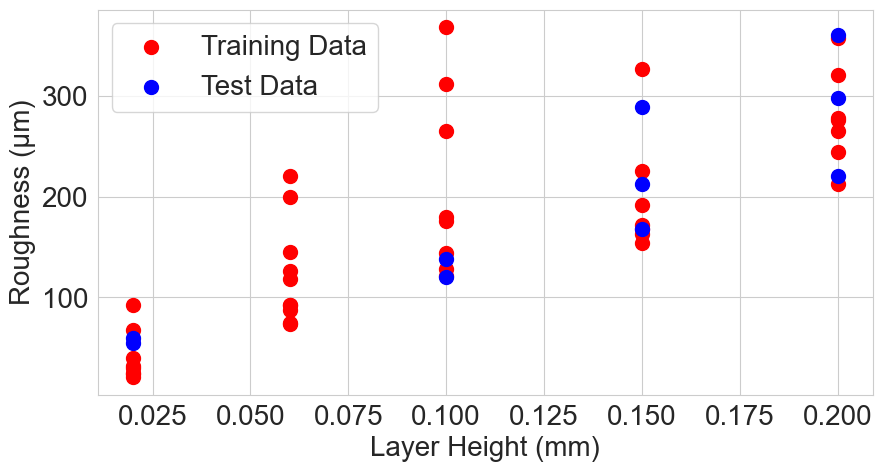

In [7]:
# Extra Step!
# Looking at the training and test data distribution
plt.figure(figsize=(10,5))
plt.scatter(x_trainl,y_trainl, s=100, color='r', label='Training Data')
plt.scatter(x_testl,y_testl, s=100, color='b',label='Test Data')
plt.xlabel('Layer Height (mm)')
plt.ylabel('Roughness (µm)')
plt.legend(loc='best');

In [8]:
# Define the instance of linear regression
lml = LinearRegression()

In [9]:
# Fitting the model to the training data
lml.fit(x_trainl,y_trainl)

LinearRegression()

In [10]:
# reporting the values of weights
w0l=lml.intercept_[0]  # w_0
w1l=lml.coef_[0][0]    # W-1
print(f'w_0={w0l:.3f} and w_1={w1l:.3f}')

w_0=43.466 and w_1=1214.549


Now, we can make predictions using our model:

In [11]:
# making prediction
yhatl = lml.predict(x_testl)
print(np.hstack([x_testl, yhatl]))

[[2.00000000e-02 6.77574137e+01]
 [1.50000000e-01 2.25648831e+02]
 [1.50000000e-01 2.25648831e+02]
 [1.00000000e-01 1.64921363e+02]
 [2.00000000e-01 2.86376299e+02]
 [2.00000000e-01 2.86376299e+02]
 [2.00000000e-02 6.77574137e+01]
 [1.50000000e-01 2.25648831e+02]
 [1.00000000e-01 1.64921363e+02]
 [2.00000000e-01 2.86376299e+02]]


### 2.2 Model Evaluation <a name="ModelEvalSLR"></a>

There are multiple available evaluation metrics for regression:

![alt text](https://docs.google.com/uc?export=download&id=1ZFL4VHPc0IhVi-rAX9HUisAladfdDkBL)

Here is how you can evaluate your model using Mean Absolute Error (MAE), Mean Squared Error (MSE) and R-Squared (R$^2$). 

In [12]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(y_testl, yhatl)
print(f'The value of mean squared error is: {MSE:.2f}')

The value of mean squared error is: 2045.00


In [13]:
# R2 score
from sklearn.metrics import r2_score

r2score = r2_score(y_testl, yhatl)
print(f'The value of R2 is: {r2score:.2f}')

The value of R2 is: 0.78


In [14]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAE=mean_absolute_error(y_testl,yhatl)
print(f'The value of mean absolute error is: {MAE:.2f}')

The value of mean absolute error is: 37.86


We can also visually inspect the fit line and see how much it represents our data points.

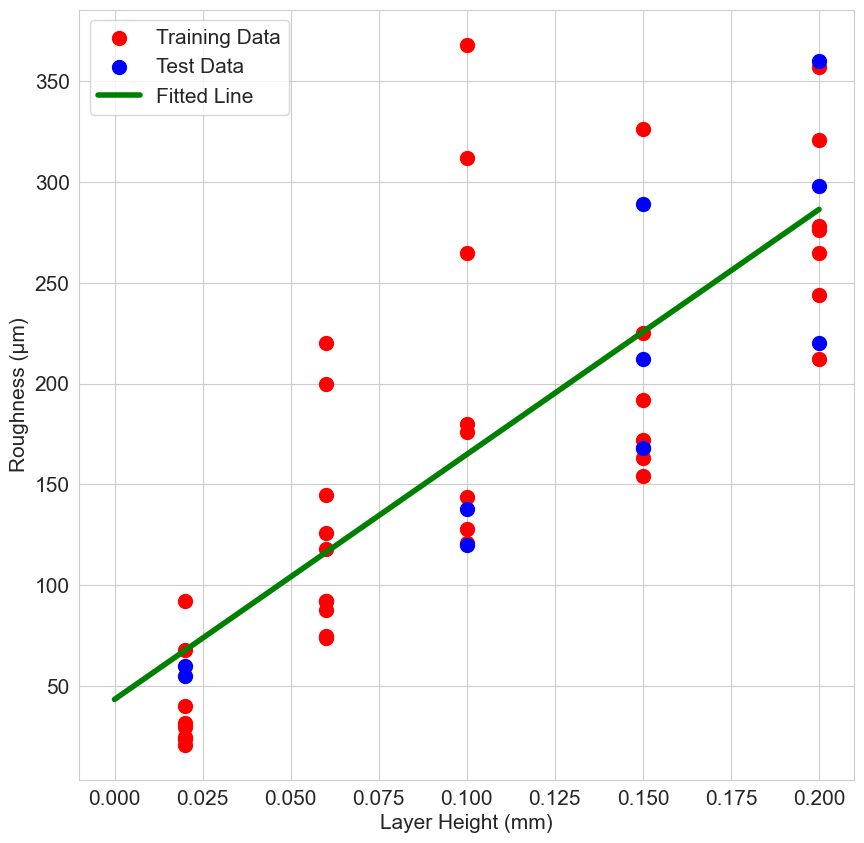

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))                       # set the size of the figure
plt.rc('font',size=15)                            # set the font size

# Plotting the training data
plt.scatter(x_trainl, y_trainl,s=100,color='red',label='Training Data')

# Plotting the test data
plt.scatter(x_testl, y_testl,s=100,color='blue', label='Test Data')

# Plotting the fitted line
xplot=np.linspace(0,0.2,num=100)
yplot=w0l+w1l*xplot
plt.plot(xplot, yplot, lw=4,color='green', label='Fitted Line')

# Labling and putting legend
plt.xlabel('Layer Height (mm)')
plt.ylabel('Roughness (µm)')
plt.grid(True)
plt.legend(loc='best');

## 3. Multiple Linear Regression <a name="MLR"></a>



### 3.1 Model Development <a name="ModelDevMLR"></a>

The fortunate thing is that multiple linear regression is the extension of simple linear regression model and can be implemented using `scikit-learn` library in a similar manner.

Here are the steps to implement multiple linear regression in Python using `scikit-learn`.

__1.__ Import linear regression and train_test_split funcions from `scikit_learn` library:
```python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
```

__2.__ Define dependant (Target Variable) and independent variables (Features) from data set:
```python
x_data=np.array(df[['column(1)','column(2)',...]]) # Features or I.V.s
y_data=np.array(df[['column']]) # Target or D.V.
```

__3.__ Split the data into train and test sets while determining the test train/test size: `x_train,x_test,y_train,y_test=train_test_split(x_data, y_data, test_size=0.2, shuffle=True)`


__4.__ Create a linear regression object using the constructor: `lm = LinearRegression() `


__5.__ Use the fit function to fit the model to the training data and find the coefficients $\omega_o$, $\omega_1$, $\omega_2$,...: `lm.fit(x_train, y_train)`

__6.__ Then, make prediction using the test data: `yhat=lm.predict(x_test)`

Let's start with two variables "layer height" and "infill density" as features (independent variables) and "roughness" as the target variable.

In [16]:
# importing required functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# defining the I.V. and Target Variable (D.V.)
x_datam=np.array(df[['layer_height','infill_density']])
y_datam=np.array(df[['roughness']])

# Splitting the data into train and test 80/20
x_trainm, x_testm, y_trainm, y_testm=train_test_split(x_datam, y_datam, test_size=0.2, shuffle=True, random_state=10)

# Define the linear regression object
lmm = LinearRegression()

Let's fit the model now

In [17]:
# Fitting the model to the training data
lmm.fit(x_trainm, y_trainm)

LinearRegression()

In [18]:
# reporting the values of weights
w0m=lmm.intercept_[0]  # w_0
w1m=lmm.coef_[0,0]     # w_1
w2m=lmm.coef_[0,1]     # w_2
print(f'w_0={w0m:0.2f}, w_1= {w1m:.2f} and w2={w2m:.2f}')

w_0=33.57, w_1= 1200.80 and w2=0.17


Now, we can make predictions using our model:

In [19]:
# making prediction
yhatm = lmm.predict(x_testm)
print(np.column_stack([x_testm, yhatm]))

[[1.50000000e-01 3.00000000e+01 2.18712730e+02]
 [1.00000000e-01 8.00000000e+01 1.67037896e+02]
 [2.00000000e-01 8.00000000e+01 2.87117610e+02]
 [2.00000000e-01 3.00000000e+01 2.78752587e+02]
 [2.00000000e-01 6.00000000e+01 2.83771601e+02]
 [1.00000000e-01 4.00000000e+01 1.60345878e+02]
 [2.00000000e-02 7.00000000e+01 6.93011207e+01]
 [1.50000000e-01 5.00000000e+01 2.22058740e+02]
 [2.00000000e-02 1.00000000e+01 5.92630932e+01]
 [2.00000000e-02 1.00000000e+01 5.92630932e+01]]


Finally, comparing the actual values and predicted values

In [20]:
np.column_stack([y_testm, yhatm])

array([[168.        , 218.71273037],
       [312.        , 167.03789636],
       [357.        , 287.11761021],
       [298.        , 278.7525873 ],
       [278.        , 283.77160105],
       [120.        , 160.34587803],
       [ 68.        ,  69.30112069],
       [168.        , 222.05873954],
       [ 21.        ,  59.2630932 ],
       [ 55.        ,  59.2630932 ]])

### 3.2 Model Evaluation <a name="ModelEvalMLR"></a>

We can evluate our model using the previously introduced evaluation metrics such as MSE, MAE, R$^2$, ... 

In [21]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSEm = mean_squared_error(y_testm, yhatm)
print(f'The value of mean squared error is: {MSEm:.2f}')

The value of mean squared error is: 3490.72


In [22]:
# R2
from sklearn.metrics import r2_score

r2scorem = r2_score(y_testm, yhatm)
print(f'The value of R2 is: {r2scorem:.2f}')

The value of R2 is: 0.73


In [23]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAEm=mean_absolute_error(y_testm, yhatm)
print(f'The value of mean absolute error is: {MAEm:.2f}')

The value of mean absolute error is: 42.88


<font color=blue>__NOTE__</font>: We can actually see that the previous model, i.e. __simple linear regression__, had a __better__ performance.

We can look at the data points along with the fit plane

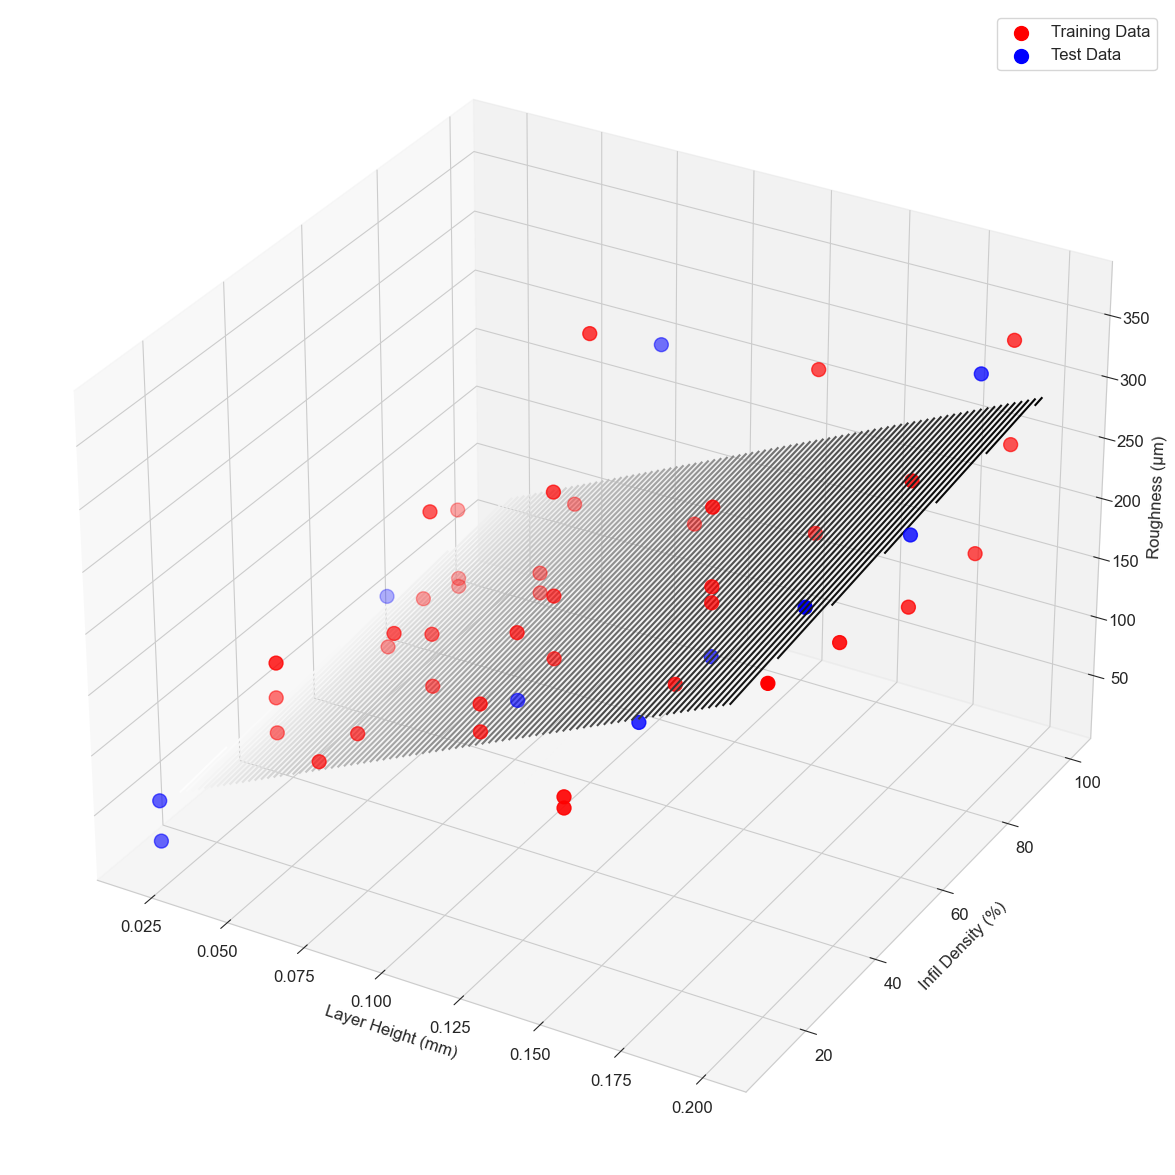

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.rc('font',size=12)

xt =x_trainm[:,0]
yt =x_trainm[:,1]
zt =y_trainm[:,0]

ax.scatter(xt, yt, zt, c='r', marker='o',s=100, label='Training Data')

xs =x_testm[:,0]
ys =x_testm[:,1]
zs =y_testm[:,0]

ax.scatter(xs, ys, zs, c='b', marker='o',s=100, label='Test Data')

xsrf = np.linspace(0.025, 0.2, 50)
ysrf = np.linspace(10,100, 50)
X, Y = np.meshgrid(xsrf, ysrf)
Z = w0m+w1m*X+w2m*Y
ax.contour3D(X, Y, Z, 100, cmap='binary')

ax.set_xlabel('Layer Height (mm)')
ax.set_ylabel('Infil Density (%)')
ax.set_zlabel('Roughness (µm)')

plt.legend()
plt.show()


What if we add `nozzle_temperature` as another feaure to our model? Let's see if it can improve the performance of our model.

In [26]:
# defining the I.V. and Target Variable (Dependat variable)
x_datam2=np.array(df[['layer_height','infill_density','nozzle_temperature']])
y_datam2=np.array(df[['roughness']])

# Splitting the data into train and test 80/20
x_trainm2,x_testm2,y_trainm2,y_testm2 = train_test_split(x_datam2,y_datam2,test_size=0.2,shuffle=True, random_state=20)

# Define the linear regression object
lmm2 = LinearRegression()

# Fitting the model to the training data
lmm2.fit(x_trainm2,y_trainm2)

# reporting the values of weights
w0m2=lmm2.intercept_[0]
w1m2=lmm2.coef_[0,0]
w2m2=lmm2.coef_[0,1]
w3m2=lmm2.coef_[0,2]
print(f'w_0= {w0m2:.2f}, w_1={w1m2:.2f}, w_2={w2m2:.2f}, w_3={w3m2:.2f}')

# making prediction
yhatm2 = lmm2.predict(x_testm2)

w_0= -397.51, w_1=1153.95, w_2=0.14, w_3=1.94


In [27]:
MSEm2=mean_squared_error(y_testm2,yhatm2)
print(f'The value of mean squared error is: {MSEm2:.2f}')

r2scorem2 = r2_score(y_testm2,yhatm2)
print(f'The value of R2 is: {r2scorem2:.2f}')

MAEm2=mean_absolute_error(y_testm2,yhatm2)
print(f'The value of mean absolute error is: {MAEm2:.2f}')

The value of mean squared error is: 5837.85
The value of R2 is: 0.58
The value of mean absolute error is: 62.59


Let's compare the values of $R^2$, MSE, and MAE for all models.

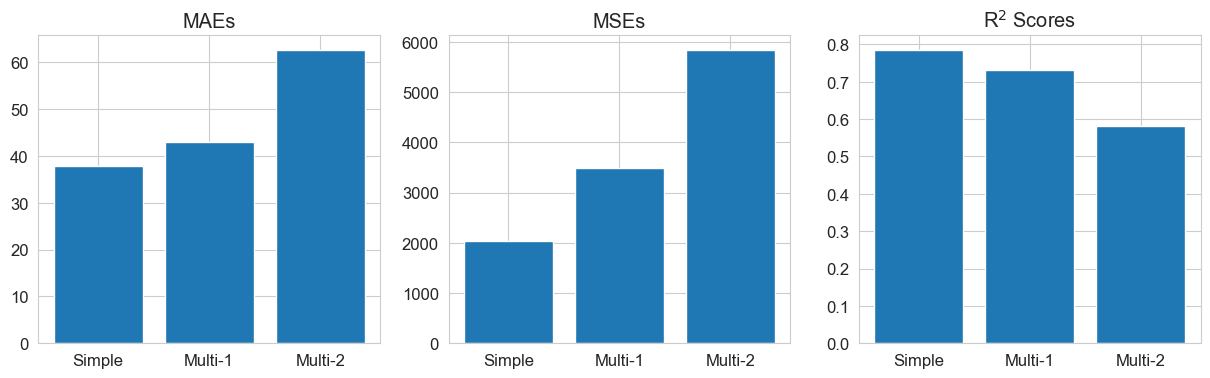

In [28]:
MAEs = [MAE, MAEm, MAEm2]
MSEs = [MSE, MSEm, MSEm2]
R2s = [r2score, r2scorem, r2scorem2]
names = ['Simple', 'Multi-1', 'Multi-2']
fig, axes=plt.subplots(nrows=1, ncols=3, figsize=(15,4))
axes[0].bar(names, MAEs)
axes[0].set_title('MAEs')
axes[1].bar(names, MSEs)
axes[1].set_title('MSEs')
axes[2].bar(names, R2s)
axes[2].set_title(f'R$^2$ Scores');

## 3. Final Comment <a name="FinalComments"></a>

When we are developing a model using linear regression, we need to determine the best fit. To do so, we look at a combination of 

- Do the predicted values make sense?

- Visualization

- Evaluation Metrics

- Comparing models